In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [6]:
# Downloading Movie Poster Dataset From GitHub 
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 55.46 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [7]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [8]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
#Converting Images to Arrays
img_width = 250
img_height = 250

x = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)

x = np.array(x)

100%|██████████| 7254/7254 [00:19<00:00, 363.57it/s]


In [10]:
x.shape

(7254, 250, 250, 3)

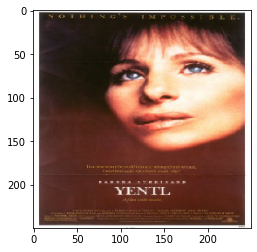

In [11]:
plt.imshow(x[15])

In [12]:
data['Genre'][15]

"['Drama', 'Musical', 'Romance']"

In [13]:
# Since we have all labels One-Hot-Encoded, we need to drop the columns for Id and Genre to get prediction Variable
y = data.drop(['Id','Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.15)

# Building a Customised CNN Model

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(25, activation='sigmoid')
])



In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       7

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
193/193 [==============================] - 6s 30ms/step - loss: 0.2598 - acc: 0.2652 - val_loss: 0.2520 - val_acc: 0.1781
Epoch 2/20
193/193 [==============================] - 6s 29ms/step - loss: 0.2409 - acc: 0.2899 - val_loss: 0.2409 - val_acc: 0.3370
Epoch 3/20
193/193 [==============================] - 6s 29ms/step - loss: 0.2368 - acc: 0.3085 - val_loss: 0.2358 - val_acc: 0.3471
Epoch 4/20
193/193 [==============================] - 6s 29ms/step - loss: 0.2336 - acc: 0.3299 - val_loss: 0.2378 - val_acc: 0.2176
Epoch 5/20
193/193 [==============================] - 6s 29ms/step - loss: 0.2307 - acc: 0.3294 - val_loss: 0.2329 - val_acc: 0.3297
Epoch 6/20
193/193 [==============================] - 6s 29ms/step - loss: 0.2290 - acc: 0.3403 - val_loss: 0.2295 - val_acc: 0.3251
Epoch 7/20
193/193 [==============================] - 6s 29ms/step - loss: 0.2270 - acc: 0.3432 - val_loss: 0.2298 - val_acc: 0.2727
Epoch 8/20
193/193 [==============================] - 6s 29ms/step - 

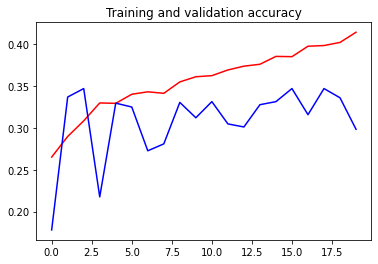

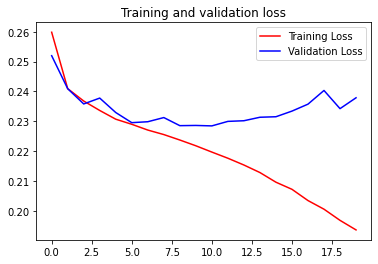

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# AlexNet Model

In [0]:
model2 = tf.keras.models.Sequential([
                                    
    tf.keras.layers.Conv2D(96, (11,11),strides = (4,4),activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),

    tf.keras.layers.Conv2D(256, (5,5), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),

    tf.keras.layers.Conv2D(384, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(384, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 60, 60, 96)        34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 384)       885120    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 384)       1327488   
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 256)      

In [0]:
from tensorflow.keras.optimizers import RMSprop

model2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
193/193 [==============================] - 7s 34ms/step - loss: 0.2658 - acc: 0.2412 - val_loss: 0.2429 - val_acc: 0.3131
Epoch 2/20
193/193 [==============================] - 6s 32ms/step - loss: 0.2456 - acc: 0.2782 - val_loss: 0.2563 - val_acc: 0.3095
Epoch 3/20
193/193 [==============================] - 6s 32ms/step - loss: 0.2412 - acc: 0.3045 - val_loss: 0.2456 - val_acc: 0.3030
Epoch 4/20
193/193 [==============================] - 6s 32ms/step - loss: 0.2389 - acc: 0.3095 - val_loss: 0.2511 - val_acc: 0.2415
Epoch 5/20
193/193 [==============================] - 6s 32ms/step - loss: 0.2364 - acc: 0.3299 - val_loss: 0.2382 - val_acc: 0.3067
Epoch 6/20
193/193 [==============================] - 6s 32ms/step - loss: 0.2341 - acc: 0.3338 - val_loss: 0.2351 - val_acc: 0.3425
Epoch 7/20
193/193 [==============================] - 6s 32ms/step - loss: 0.2311 - acc: 0.3406 - val_loss: 0.2366 - val_acc: 0.2277
Epoch 8/20
193/193 [==============================] - 6s 33ms/step - 

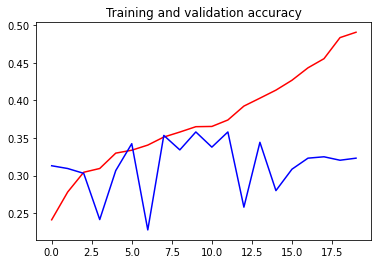

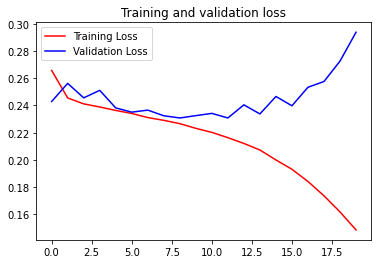

In [0]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# VGG-16 Model

In [0]:
model3 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
   
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 248, 248, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 246, 246, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 121, 121, 128)     73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 119, 119, 128)     147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 59, 59, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 57, 57, 256)      

In [0]:
'''model3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])'''

In [0]:
from tensorflow.keras.optimizers import Adam, SGD
adam = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95)
model3.compile(loss='binary_crossentropy',
               optimizer = adam,
               metrics=['acc'])

In [0]:
history3 = model3.fit(X_train, y_train, batch_size = 100, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
62/62 [==============================] - 52s 839ms/step - loss: 0.2424 - acc: 0.1940 - val_loss: 0.2428 - val_acc: 0.1901
Epoch 2/10
62/62 [==============================] - 46s 744ms/step - loss: 0.2424 - acc: 0.1940 - val_loss: 0.2428 - val_acc: 0.1901
Epoch 3/10
62/62 [==============================] - 46s 744ms/step - loss: 0.2424 - acc: 0.1940 - val_loss: 0.2428 - val_acc: 0.1901
Epoch 4/10
62/62 [==============================] - 46s 744ms/step - loss: 0.2424 - acc: 0.1940 - val_loss: 0.2428 - val_acc: 0.1901
Epoch 5/10
62/62 [==============================] - 46s 745ms/step - loss: 0.2424 - acc: 0.1940 - val_loss: 0.2428 - val_acc: 0.1901
Epoch 6/10
62/62 [==============================] - 46s 744ms/step - loss: 0.2424 - acc: 0.1940 - val_loss: 0.2428 - val_acc: 0.1901
Epoch 7/10
62/62 [==============================] - 46s 744ms/step - loss: 0.2424 - acc: 0.1940 - val_loss: 0.2428 - val_acc: 0.1901
Epoch 8/10
62/62 [==============================] - 46s 744ms/step - 

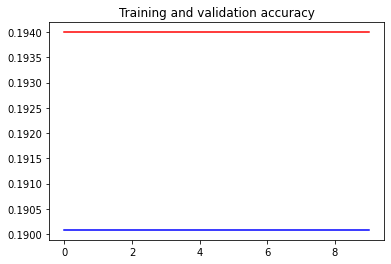

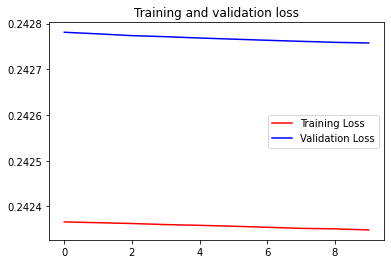

In [0]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# ResNet Pre-Trained

In [0]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [15]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (250, 250, 3), 
                                include_top = False, 
                                weights = None)# Your Code Here

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False
  # Your Code Here
  
# Print the model summary
pre_trained_model.summary()

--2020-06-04 04:48:38--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   103MB/s    in 0.8s    

2020-06-04 04:48:40 (103 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250, 250, 3) 0                                 

In [20]:
last_layer = pre_trained_model.get_layer('mixed7')# Your Code Here)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 13, 13, 768)


In [34]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x) 
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense  (25, activation='sigmoid')(x)            

model4 = Model( pre_trained_model.input,x) 

model4.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy',  
              metrics = ['accuracy'])

model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 124, 124, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 124, 124, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 124, 124, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [35]:
history4 = model4.fit(X_train, y_train, batch_size = 20, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
309/309 [==============================] - 22s 71ms/step - loss: 0.2874 - accuracy: 0.2697 - val_loss: 0.2262 - val_accuracy: 0.3774
Epoch 2/10
309/309 [==============================] - 21s 68ms/step - loss: 0.2232 - accuracy: 0.3836 - val_loss: 0.2157 - val_accuracy: 0.3838
Epoch 3/10
309/309 [==============================] - 21s 68ms/step - loss: 0.1796 - accuracy: 0.4681 - val_loss: 0.2375 - val_accuracy: 0.3921
Epoch 4/10
309/309 [==============================] - 21s 68ms/step - loss: 0.1368 - accuracy: 0.5275 - val_loss: 0.2577 - val_accuracy: 0.3453
Epoch 5/10
309/309 [==============================] - 21s 68ms/step - loss: 0.1000 - accuracy: 0.5653 - val_loss: 0.2728 - val_accuracy: 0.3535
Epoch 6/10
309/309 [==============================] - 21s 68ms/step - loss: 0.0718 - accuracy: 0.5671 - val_loss: 0.2912 - val_accuracy: 0.3425
Epoch 7/10
309/309 [==============================] - 21s 68ms/step - loss: 0.0518 - accuracy: 0.5721 - val_loss: 0.3328 - val_accuracy:

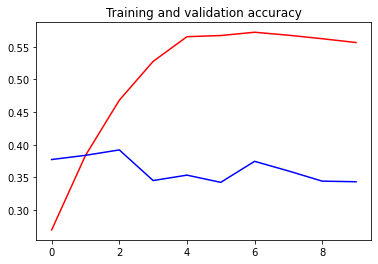

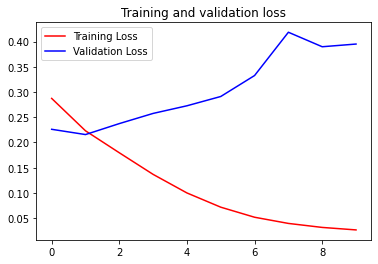

In [36]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Saving Model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# Saving Model2
# serialize model to JSON
model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# Saving Model3
# serialize model to JSON
model_json = model3.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model3.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk


In [39]:
# Saving Model4
# serialize model to JSON
model_json = model4.to_json()
with open("model4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model4.save_weights("model4.h5")
print("Saved model to disk")

Saved model to disk


Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
[[3.4938079e-01 2.1486364e-03 1.2541883e-06 3.3067317e-06 4.5489933e-06
  3.4892020e-01 1.5531748e-05 4.6146938e-01 4.6165253e-04 4.4538015e-03
  7.0750457e-06 3.0478986e-02 1.2112835e-05 2.9251583e-05 6.2724143e-01
  4.8792832e-09 1.1285974e-07 7.0991661e-09 1.5501131e-02 5.4666763e-03
  5.4970256e-05 3.0398793e-05 9.4291800e-01 2.7689121e-06 2.4684527e-05]]
Thriller
Mystery
Drama


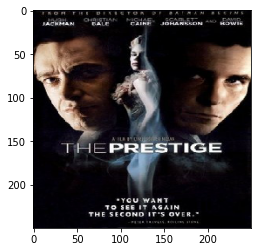

In [45]:
im = image.load_img('/content/theprestige.jpg', target_size=(img_width, img_height, 3))
plt.imshow(im)
im = image.img_to_array(im)
im = im/255.0
im = im.reshape(1, img_width, img_height, 3)
genres = data.columns[2:]
print(genres)
y_prob = model4.predict(im)
print(y_prob)
temp1 = y_prob[0]
check = []
for e in temp1:
  check.append(e)
temp2 = y_prob[0]
temp2.sort()
a=temp2[24]
b=temp2[23]
c=temp2[22]
print(genres[check.index(a)])
print(genres[check.index(b)])
print(genres[check.index(c)])


